In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data=pd.read_csv("loan-train.csv")

In [151]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
data.shape

(614, 13)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [154]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [155]:
pd.crosstab(data['Credit_History'],data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [156]:
pd.crosstab(data['ApplicantIncome'],data['Loan_Status'], margins=True)

Loan_Status,N,Y,All
ApplicantIncome,,,
150,1,0,1
210,0,1,1
416,1,0,1
645,0,1,1
674,0,1,1
...,...,...,...
39999,0,1,1
51763,0,1,1
63337,0,1,1


<Axes: >

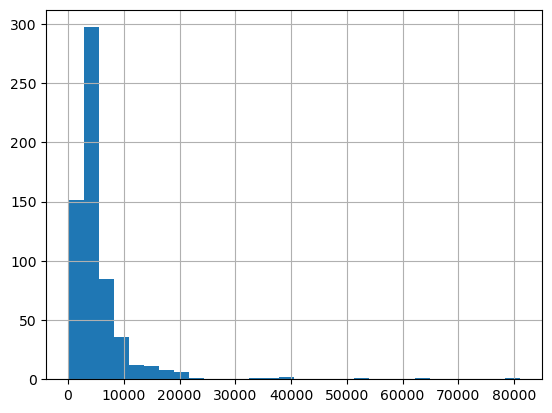

In [157]:
data["ApplicantIncome"].hist(bins=30)

<Axes: >

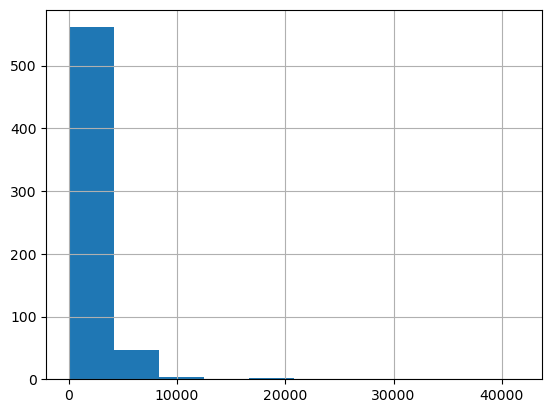

In [158]:
data["CoapplicantIncome"].hist()

<Axes: >

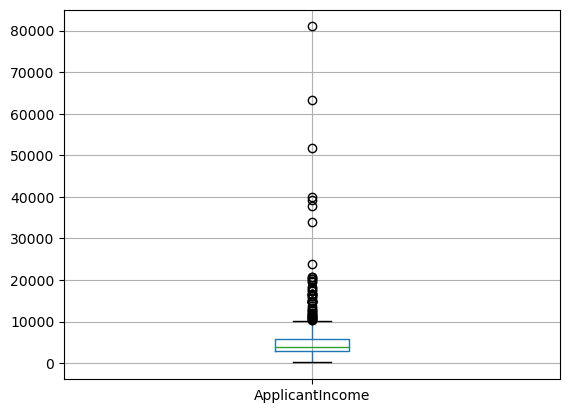

In [159]:
data.boxplot(column='ApplicantIncome')

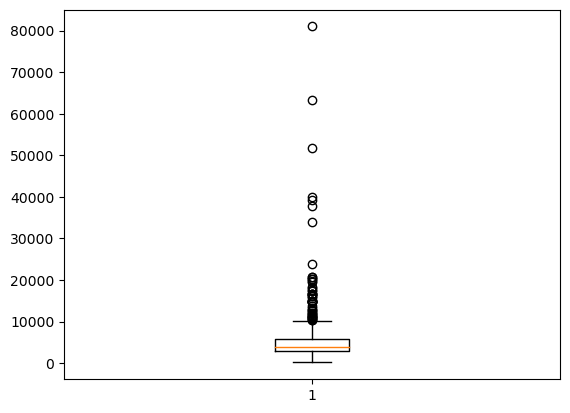

<Figure size 1000x700 with 0 Axes>

In [160]:
plt.boxplot(data['ApplicantIncome'])
fig = plt.figure(figsize =(10, 7))
plt.show() 
#for outliers 
#each dot is outlier

<Axes: >

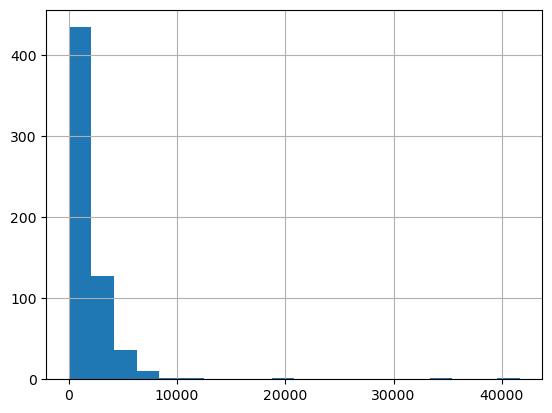

In [161]:
data['CoapplicantIncome'].hist(bins=20)

<Axes: >

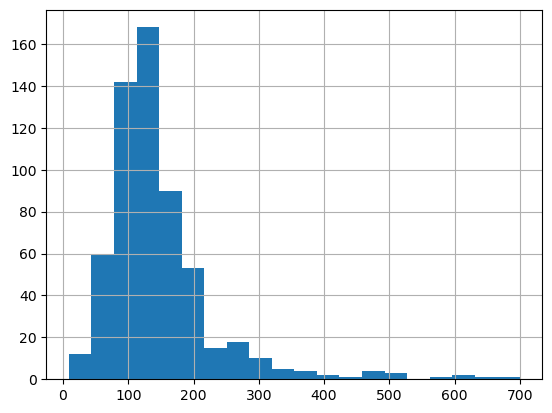

In [162]:
data['LoanAmount'].hist(bins=20)

<Axes: >

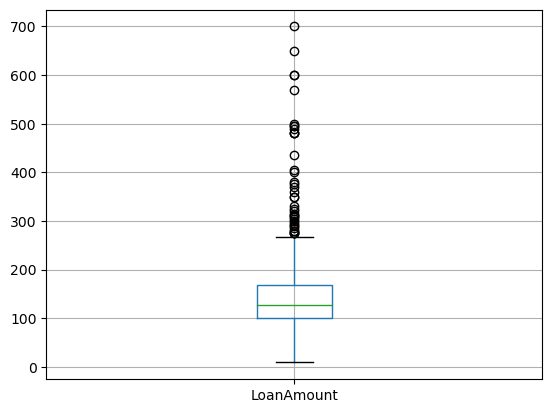

In [163]:
data.boxplot(column='LoanAmount')

<Axes: >

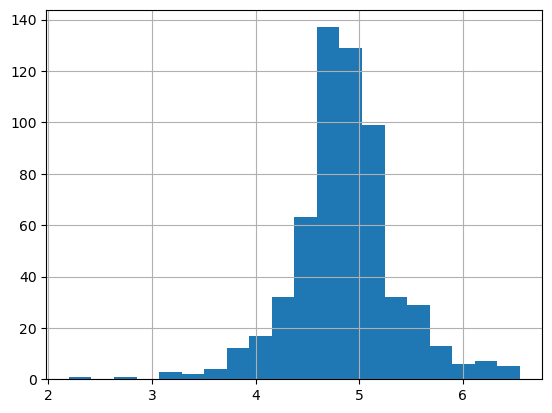

In [164]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [165]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [166]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [167]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [168]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [169]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']
data['TotalIncome_log']=np.log(data['TotalIncome'])

<Axes: >

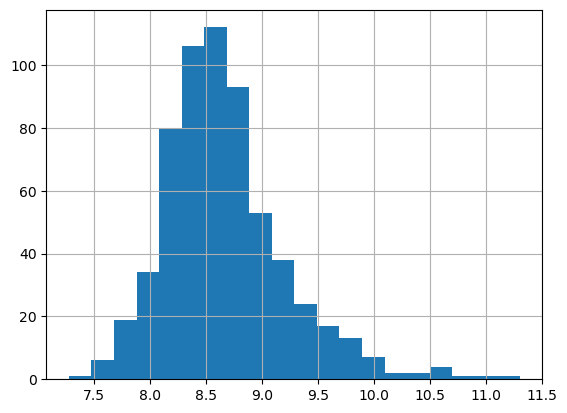

In [170]:
data['TotalIncome_log'].hist(bins=20)

In [171]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [172]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [173]:
cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']
x=data[cols].values
x

array([['Male', 'No', '0', ..., 4.857444178729352, 5849.0,
        8.674025985443025],
       ['Male', 'Yes', '1', ..., 4.852030263919617, 6091.0,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 4.189654742026425, 3000.0,
        8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 5.53338948872752, 8312.0,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 5.231108616854587, 7583.0,
        8.933664178700935],
       ['Female', 'No', '0', ..., 4.890349128221754, 4583.0,
        8.430109084509125]], dtype=object)

In [174]:
y=data['Loan_Status'].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [176]:
x_train

array([['Male', 'Yes', '0', ..., 4.875197323201151, 5858.0,
        8.675563527387679],
       ['Male', 'No', '1', ..., 5.278114659230517, 11250.0,
        9.328123407632566],
       ['Male', 'Yes', '0', ..., 5.003946305945459, 5681.0,
        8.644882552557126],
       ...,
       ['Male', 'Yes', '3+', ..., 5.298317366548036, 8334.0,
        9.0280988119824],
       ['Male', 'Yes', '0', ..., 5.075173815233827, 6033.0,
        8.704999678440762],
       ['Female', 'Yes', '0', ..., 5.204006687076795, 6486.0,
        8.777401286867264]], dtype=object)

In [177]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
#to convert categorical text to numeric format
#like male/female to 0/1

In [178]:
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])


In [179]:
x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [188]:
x_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.03484798,
        -0.18578759,  0.00958339],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.83102078,
         0.59265746,  1.16625572],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.28925857,
        -0.21134115, -0.04479911],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.87094174,
         0.17167345,  0.63445755],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.43000557,
        -0.16052278,  0.06175942],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.68458193,
        -0.095123  ,  0.19009237]])

In [181]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [182]:
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])


In [183]:
x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

In [184]:
x_test

array([[1, 0, 0, ..., 4.430816798843313, 7085.0, 8.865735152124781],
       [0, 0, 0, ..., 4.718498871295094, 4230.0, 8.349957272040324],
       [1, 1, 0, ..., 5.780743515792329, 10039.0, 9.214232786691527],
       ...,
       [1, 1, 0, ..., 6.077642243349034, 14583.0, 9.587611745713565],
       [1, 1, 3, ..., 4.248495242049359, 4611.0, 8.436200032206706],
       [1, 1, 1, ..., 4.564348191467836, 3428.0, 8.13973227971767]],
      dtype=object)

In [185]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [186]:
#scaling data

In [187]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)


In [189]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [190]:
y_pred=DTClassifier.predict(x_test)
y_pred
#predicted data

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [192]:
#testing accuracy
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)


0.7154471544715447

In [195]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train, y_train)
y_lin=model.predict(x_test)

In [196]:
y_lin

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [197]:
metrics.accuracy_score(y_lin,y_test)

0.8455284552845529

In [198]:
testdata=pd.read_csv('loan-test.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [216]:
testdata.shape

(367, 15)

In [199]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [201]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(),inplace=True)

In [202]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

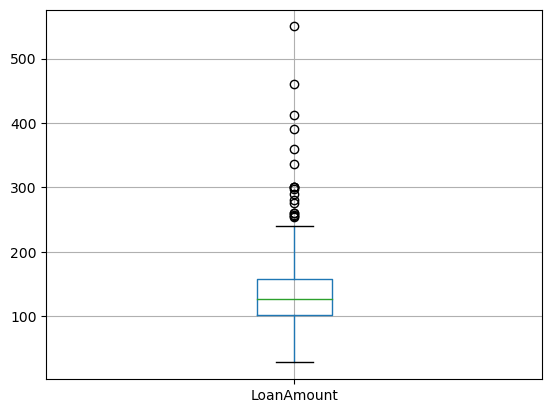

In [203]:
testdata.boxplot(column='LoanAmount')

<Axes: >

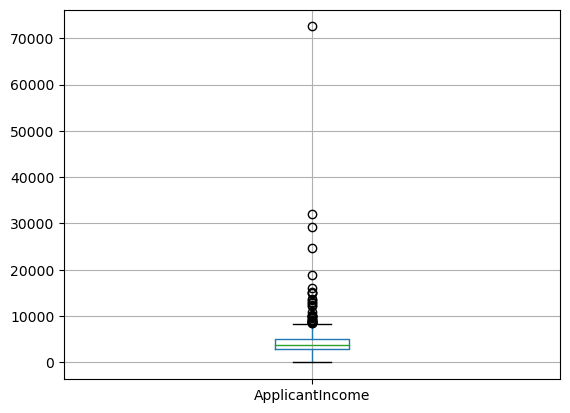

In [204]:
testdata.boxplot(column='ApplicantIncome')

In [206]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])

In [207]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [208]:
cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log']
test=testdata[cols].values

In [209]:
test

array([['Male', 'Yes', '0', ..., 4.700480365792417, 5720,
        8.651724084373843],
       ['Male', 'Yes', '1', ..., 4.836281906951478, 4576,
        8.428580533059634],
       ['Male', 'Yes', '2', ..., 5.337538079701318, 6800,
        8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 4.836281906951478, 5243,
        8.564649132572534],
       ['Male', 'Yes', '0', ..., 5.062595033026967, 7393,
        8.9082888855571],
       ['Male', 'No', '0', ..., 4.584967478670572, 9200,
        9.126958763037132]], dtype=object)

In [210]:
for i in range(0,5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])
test[:,7]=labelencoder_x.fit_transform(test[:,7])

In [212]:
test[0]

array([1, 1, 0, 0, 0, 5720, 0, 52, 360.0, 1.0, 4.700480365792417, 5720,
       8.651724084373843], dtype=object)

In [213]:
test=ss.fit_transform(test)

In [214]:
pred=model.predict(test)

In [215]:
pred

#final prediction 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [219]:
testdata['Eligibility'] = np.where(pred == 1, 'Y', 'N')
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Eligible,Eligibility
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724,1,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581,1,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678,1,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129,1,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786,8.663196,1,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867,8.490233,1,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,5243,8.564649,1,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393,8.908289,1,Y
